In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [12]:
df = pd.read_csv("USA_Housing_Dataset.csv")

In [13]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
#EXPLORING NUMERICAL AND CATEGORICAL VARIABLES

In [16]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [17]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [18]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

sqft_lot         2856
price            1625
sqft_living       549
sqft_above        491
sqft_basement     205
yr_built          115
yr_renovated       60
bathrooms          24
bedrooms            9
floors              6
view                5
condition           5
waterfront          2
dtype: int64

In [34]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 25]
potential_categorical_from_numerical

,bedrooms,bathrooms,floors,waterfront,view,condition
0,3.0,2.00,3.0,0,0,3
1,4.0,3.25,2.0,0,0,3
2,5.0,6.50,2.0,0,0,3
3,3.0,2.25,2.0,0,0,3
4,5.0,2.75,1.0,0,0,5
...,...,...,...,...,...,...
4135,3.0,1.75,1.0,0,0,4
4136,3.0,2.50,2.0,0,0,3
4137,3.0,2.50,2.0,0,0,3
4138,4.0,2.00,1.0,0,0,3


In [ ]:
#note:waterfront is a boolean.

In [33]:
print(df['bathrooms'].nunique())

24


In [35]:
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)


In [36]:
df_categorical

,date,street,city,statezip,country,bedrooms,bathrooms,floors,waterfront,view,condition
0,2014-05-09 00:00:00,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,3.0,2.00,3.0,0,0,3
1,2014-05-09 00:00:00,33001 NE 24th St,Carnation,WA 98014,USA,4.0,3.25,2.0,0,0,3
2,2014-05-09 00:00:00,7070 270th Pl SE,Issaquah,WA 98029,USA,5.0,6.50,2.0,0,0,3
3,2014-05-09 00:00:00,820 NW 95th St,Seattle,WA 98117,USA,3.0,2.25,2.0,0,0,3
4,2014-05-10 00:00:00,10834 31st Ave SW,Seattle,WA 98146,USA,5.0,2.75,1.0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,501 N 143rd St,Seattle,WA 98133,USA,3.0,1.75,1.0,0,0,4
4136,2014-07-09 00:00:00,14855 SE 10th Pl,Bellevue,WA 98007,USA,3.0,2.50,2.0,0,0,3
4137,2014-07-09 00:00:00,759 Ilwaco Pl NE,Renton,WA 98059,USA,3.0,2.50,2.0,0,0,3
4138,2014-07-10 00:00:00,5148 S Creston St,Seattle,WA 98178,USA,4.0,2.00,1.0,0,0,3


In [37]:
# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [38]:
df_numerical

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.760000e+05,1340,1384,1340,0,2008,0
1,8.000000e+05,3540,159430,3540,0,2007,0
2,2.238888e+06,7270,130017,6420,850,2010,0
3,3.240000e+05,998,904,798,200,2007,0
4,5.499000e+05,3060,7015,1600,1460,1979,0
...,...,...,...,...,...,...,...
4135,3.081667e+05,1510,6360,1510,0,1954,1979
4136,5.343333e+05,1460,7573,1460,0,1983,2009
4137,4.169042e+05,3010,7014,3010,0,2009,0
4138,2.034000e+05,2090,6630,1070,1020,1974,0


In [22]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [23]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)

# All columns seem categorical, as there isn't a wide variability of values.

street      4079
statezip      77
date          68
city          43
country        1
dtype: int64

In [39]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

True

In [ ]:
#DATA CLEANING

In [40]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [41]:
df.columns[df.isnull().mean() > 0.8] #there are no missing values.

Index([], dtype='object')

In [42]:
# Removing the "date" column from the dataframe because it doesn't give any real insight.
df.drop("date", inplace=True, axis=1)

In [ ]:
#UNIVARIATE ANALYSIS

In [71]:
#Categorical Variables
#Frequency table for bedrooms
frequency_table_bedroom = df['bedrooms'].value_counts()

In [45]:
frequency_table_bedroom

bedrooms
3.0    1833
4.0    1382
2.0     500
5.0     317
6.0      56
1.0      37
7.0      11
8.0       2
0.0       2
Name: count, dtype: int64

In [59]:
bedrooms_table = pd.crosstab(index = df_categorical['bedrooms'],  # Make a crosstab
                              columns="count")      # Name the count column
bedrooms_table

col_0,count
bedrooms,
0.0,2
1.0,37
2.0,500
3.0,1833
4.0,1382
5.0,317
6.0,56
7.0,11
8.0,2


In [68]:
proportion_bedrooms=(bedrooms_table /bedrooms_table.sum()).round(2)
proportion_bedrooms

col_0,count
bedrooms,
0.0,0.00
1.0,0.01
2.0,0.12
3.0,0.44
4.0,0.33
5.0,0.08
6.0,0.01
7.0,0.00
8.0,0.00


In [ ]:
#Approx. 44 percent of the houses have 3 bedrooms, whereas 12 percent of the houses have 2 bedrooms. 

In [46]:
frequency_table_waterfront = df['waterfront'].value_counts()

In [62]:
proportion_waterfront=(waterfront_table/waterfront_table.sum()).round(2)
proportion_waterfront

col_0,count
waterfront,
0,0.99
1,0.01


In [ ]:
#99 percent of the houses have no waterfront. Only one percent of the houses have a waterfront.

In [55]:
waterfront_table = pd.crosstab(index = df_categorical['waterfront'],  # Make a crosstab
                              columns="count")      # Name the count column
waterfront_table

col_0,count
waterfront,
0,4109
1,31


In [49]:
frequency_table_condition = df['condition'].value_counts()

In [50]:
frequency_table_condition

condition
3    2596
4    1114
5     398
2      27
1       5
Name: count, dtype: int64

In [56]:
condition_table = pd.crosstab(index = df_categorical['condition'],  # Make a crosstab
                              columns="count")      # Name the count column
condition_table

col_0,count
condition,
1,5
2,27
3,2596
4,1114
5,398


In [63]:
proportion_condition=(condition_table/condition_table.sum()).round(2)
proportion_condition

col_0,count
condition,
1,0.00
2,0.01
3,0.63
4,0.27
5,0.10


In [ ]:
#63 percent of the houses of a condition of 3 whereas 10 percent of the houses have a condition of 5.

In [ ]:
#Insights: The most common house condition is 3 with 2596 houses, whereas the 3 bedroom houses are the most common.1833 houses have 3 bedrooms.
#Waterfront houses are not common. There are only 31 waterfront houses.

In [ ]:
#Calculating proportions: 

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\3611138521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_bedroom.index, y=frequency_table_bedroom.values, palette="Set3")


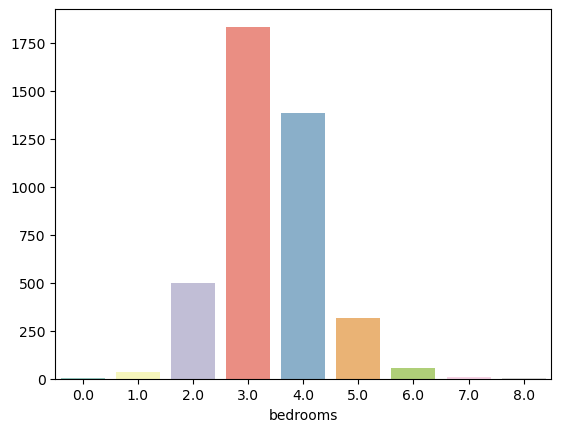

In [72]:
sns.barplot(x=frequency_table_bedroom.index, y=frequency_table_bedroom.values, palette="Set3")
plt.show();

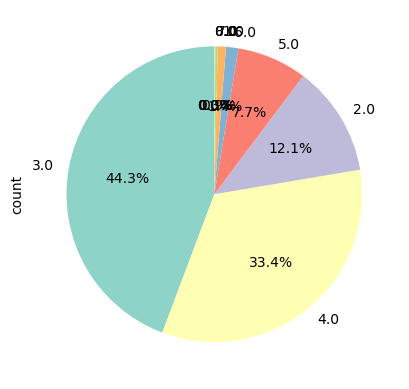

In [73]:
frequency_table_bedroom.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

plt.show();